### Import Data

In [ ]:
pip install yfinance

     |████████████████████████████████| 63 kB 1.2 MB/s 
     |████████████████████████████████| 6.4 MB 8.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
pip install yahoofinancials

  Created wheel for yahoofinancials: filename=yahoofinancials-1.6-py3-none-any.whl size=15192 sha256=67955cff739eb6abac77fe4200ebfead686f5da6f8a5024dd8b5b6e65ac280fc
  Stored in directory: /root/.cache/pip/wheels/4b/63/46/e7110bfee88685fe69e338d1b14d1748921862aa57b6705b60
Successfully built yahoofinancials


In [ ]:
#reference: https://www.analyticsvidhya.com/blog/2021/06/download-financial-dataset-using-yahoo-finance-in-python-a-complete-guide/
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import math
import datetime as dt
from yahoofinancials import YahooFinancials
pd.set_option('display.max_rows', 500)

In [ ]:
d = {}
for i in ['AMZN', 'TSLA', 'META', 'FB', 'NOK', 'PLTR', 'AMC', 'BB', 'WISH', 'CLOV','^GSPC',]:
    d[i] = pd.DataFrame()
    d[i] = yf.download(i,start='2021-01-01',
                       end='2021-12-31',
                       back_adjust=True,
                       auto_adjust=True, #prepost=True
                       progress=False)

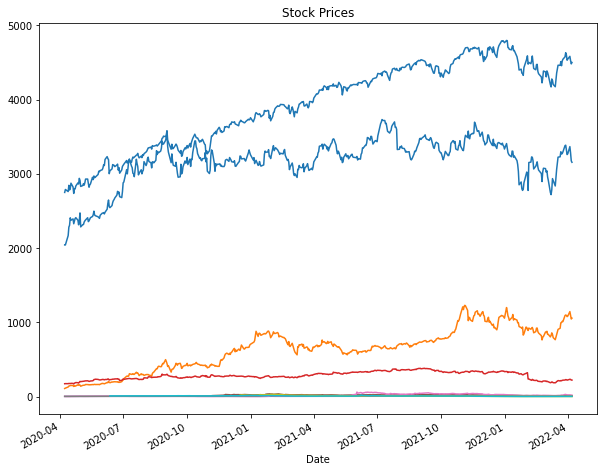

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8)) # get the axis and additionally set a bigger plot size

for i in ['AMZN', 'TSLA', 'META', 'FB', 'NOK', 'PLTR', 'AMC', 'BB', 'WISH', 'CLOV','^GSPC',]:
    tick = yf.Ticker(i)
    tick_df = tick.history(period="2y")
    tick_df['Close'].plot(title='Stock Prices')
#    legend = ax.legend(loc='upper left')


### Sample Extraction

In [ ]:
AMZN = yf.Ticker('AMZN')
AMZN.info

{'52WeekChange': -0.064204395,
 'SandP52WeekChange': 0.089955926,
 'address1': '410 Terry Avenue North',
 'algorithm': None,
 'annualHoldingsTurnover': None,
 'annualReportExpenseRatio': None,
 'ask': 3172,
 'askSize': 800,
 'averageDailyVolume10Day': 2994310,
 'averageVolume': 3913967,
 'averageVolume10days': 2994310,
 'beta': 1.119607,
 'beta3Year': None,
 'bid': 0,
 'bidSize': 900,
 'bookValue': 271.601,
 'category': None,
 'circulatingSupply': None,
 'city': 'Seattle',
 'companyOfficers': [],
 'country': 'United States',
 'currency': 'USD',
 'currentPrice': 3155.69,
 'currentRatio': 1.136,
 'dateShortInterest': 1647302400,
 'dayHigh': 3201.0205,
 'dayLow': 3090.23,
 'debtToEquity': 100.864,
 'dividendRate': None,
 'dividendYield': None,
 'earningsGrowth': 0.975,
 'earningsQuarterlyGrowth': 0.983,
 'ebitda': 59174998016,
 'ebitdaMargins': 0.12595001,
 'enterpriseToEbitda': 27.869,
 'enterpriseToRevenue': 3.51,
 'enterpriseValue': 1649145151488,
 'exDividendDate': None,
 'exchange': 

In [ ]:
AMZN.dividends #doesn't pay dividends

Series([], Name: Dividends, dtype: int64)

In [ ]:
AMZN.quarterly_financials

,2021-12-31,2021-09-30,2021-06-30,2021-03-31
Research Development,21577000000.0,12097000000.0,11794000000.0,10584000000.0
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,14935000000.0,4311000000.0,8646000000.0,10263000000.0
Minority Interest,None,None,None,None
Net Income,14323000000.0,3156000000.0,7778000000.0,8107000000.0
Selling General Administrative,29516000000.0,30944000000.0,29397000000.0,26628000000.0
Gross Profit,54577000000.0,47882000000.0,48904000000.0,46115000000.0
Ebit,3460000000.0,4852000000.0,7702000000.0,8865000000.0
Operating Income,3460000000.0,4852000000.0,7702000000.0,8865000000.0
Other Operating Expenses,24000000.0,-11000000.0,11000000.0,38000000.0


In [ ]:
AMZN.major_holders

,0,1
0,9.88%,% of Shares Held by All Insider
1,60.36%,% of Shares Held by Institutions
2,66.98%,% of Float Held by Institutions
3,5322,Number of Institutions Holding Shares


In [ ]:
AMZN.quarterly_earnings

,Revenue,Earnings
Quarter,,
1Q2021,108518000000,8107000000
2Q2021,113080000000,7778000000
3Q2021,110812000000,3156000000
4Q2021,137412000000,14323000000


In [ ]:
AMZN.recommendations

,Firm,To Grade,From Grade,Action
Date,,,,
2011-12-29 12:47:00,PiperJaffray,,,main
2012-02-15 07:33:00,PiperJaffray,Overweight,,main
2012-02-16 06:17:00,Morgan Stanley,Equal-Weight,,down
2012-04-02 06:06:00,Bank oferica,Neutral,,down
2012-04-27 06:21:00,Bank oferica,Buy,,up
2012-04-27 07:20:00,Benchmark,Buy,,main
2012-04-27 08:09:00,Canaccord Genuity,Hold,,main
2012-04-27 08:18:00,Deutsche Bank,Buy,,main
2012-04-27 08:38:00,JP Morgan,Overweight,,main


### % Change Adj Close Price

In [ ]:
for i in ['AMZN', 'TSLA', 'META', 'FB', 'NOK', 'PLTR', 'AMC', 'BB', 'WISH', 'CLOV','^GSPC',]:
    d[i]['Daily%Change'] = d[i]['Close'].pct_change()*100
    d[i]['2D%Change'] = d[i]['Close'].pct_change(periods=2)*100
    d[i]['3D%Change'] = d[i]['Close'].pct_change(periods=3)*100
    d[i]['4D%Change'] = d[i]['Close'].pct_change(periods=4)*100
    d[i]['5D%Change'] = d[i]['Close'].pct_change(periods=5)*100
    d[i]['6D%Change'] = d[i]['Close'].pct_change(periods=6)*100
    d[i]['7D%Change'] = d[i]['Close'].pct_change(periods=7)*100

In [ ]:
d['NOK'].head()

,Open,High,Low,Close,Volume,Daily%Change,2D%Change,3D%Change,4D%Change,5D%Change,6D%Change,7D%Change
Date,,,,,,,,,,,,
2021-01-04,3.99,3.99,3.85,3.89,30281400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,3.99,4.06,3.95,4.04,38446200,3.856037,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-06,4.01,4.09,4.01,4.04,37467400,0.000000,3.856037,NaN,NaN,NaN,NaN,NaN
2021-01-07,4.01,4.03,3.97,3.99,25318000,-1.237623,-1.237623,2.570692,NaN,NaN,NaN,NaN
2021-01-08,3.94,3.96,3.90,3.93,23978700,-1.503758,-2.722770,-2.722770,1.028277,NaN,NaN,NaN


### Direction of Change

In [ ]:
#1 if positive, 0 if no change or negative
for i in ['AMZN', 'TSLA', 'META', 'FB', 'NOK', 'PLTR', 'AMC', 'BB', 'WISH', 'CLOV','^GSPC',]:
    d[i]['Dir'] = np.where(d[i]['Daily%Change']>0, 1,0)
    d[i]['2Dir'] = np.where(d[i]['2D%Change']>0, 1,0)
    d[i]['3Dir'] = np.where(d[i]['3D%Change']>0, 1,0)
    d[i]['4Dir'] = np.where(d[i]['4D%Change']>0, 1,0)
    d[i]['5Dir'] = np.where(d[i]['5D%Change']>0, 1,0)
    d[i]['6Dir'] = np.where(d[i]['6D%Change']>0, 1,0)
    d[i]['7Dir'] = np.where(d[i]['7D%Change']>0, 1,0)
    d[i]['date'] = d[i].index


In [ ]:
d['AMC'].head()

,Open,High,Low,Close,Volume,Daily%Change,2D%Change,3D%Change,4D%Change,5D%Change,6D%Change,7D%Change,Dir,2Dir,3Dir,4Dir,5Dir,6Dir,7Dir,date
Date,,,,,,,,,,,,,,,,,,,,
2021-01-04,2.20,2.20,2.00,2.01,29873800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,2021-01-04
2021-01-05,1.99,2.03,1.91,1.98,28148300,-1.492536,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,2021-01-05
2021-01-06,2.03,2.23,1.97,2.01,67363300,1.515150,0.000000,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,2021-01-06
2021-01-07,2.08,2.11,2.02,2.05,26150500,1.990048,3.535350,1.990048,NaN,NaN,NaN,NaN,1,1,1,0,0,0,0,2021-01-07
2021-01-08,2.09,2.21,2.07,2.14,39553300,4.390251,6.467667,8.080812,6.467667,NaN,NaN,NaN,1,1,1,1,0,0,0,2021-01-08


### Variance

In [ ]:
#TSLA.info['beta']

In [ ]:
h = {}
for i in ['AMZN', 'TSLA', 'META', 'FB', 'NOK', 'PLTR', 'AMC', 'BB', 'WISH', 'CLOV','^GSPC',]:
    h[i] = pd.DataFrame()
    h[i] = yf.download(i,start='2021-01-01',
                       end='2021-12-31',
                       interval='1h',
                       back_adjust=True,
                       auto_adjust=True, #prepost=True
                       progress=False)


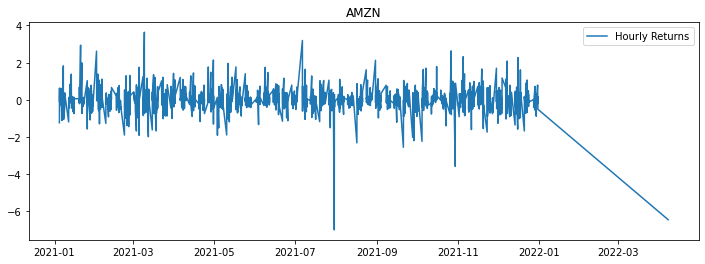

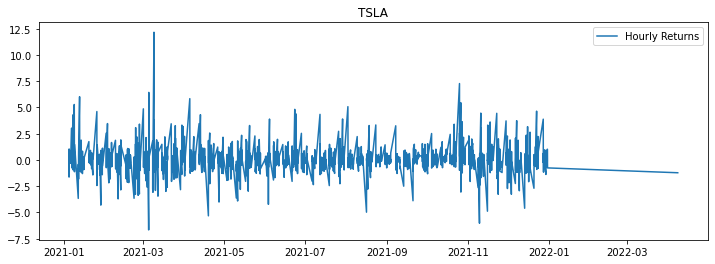

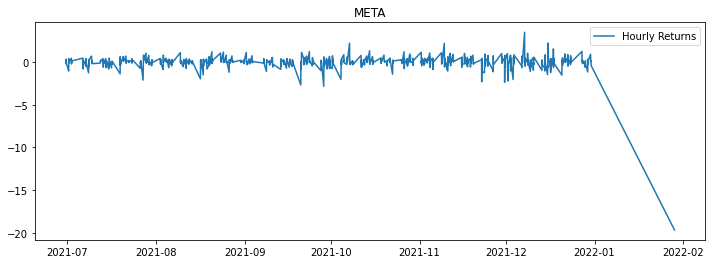

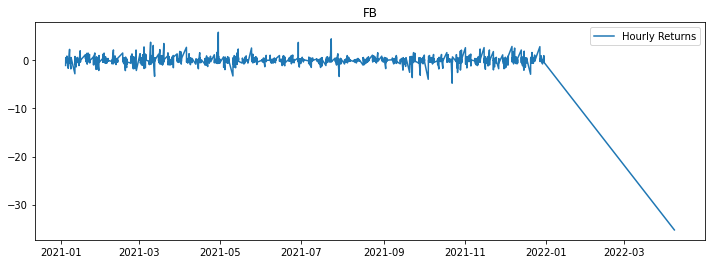

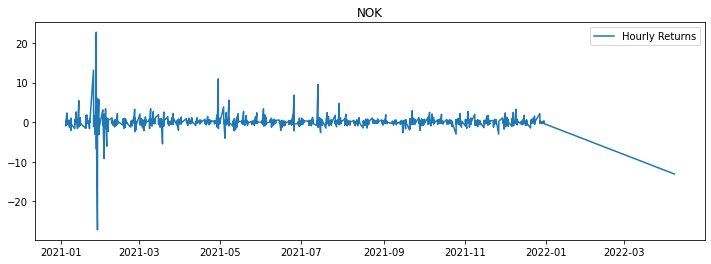

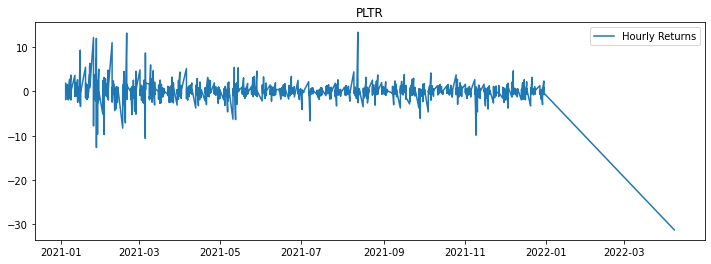

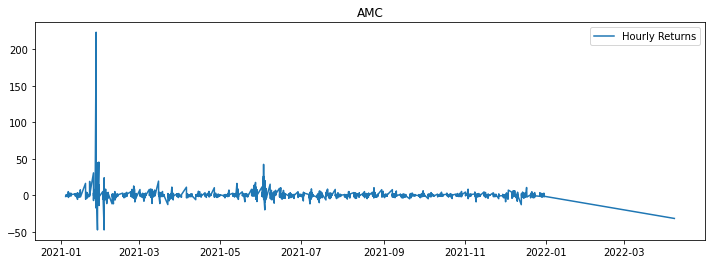

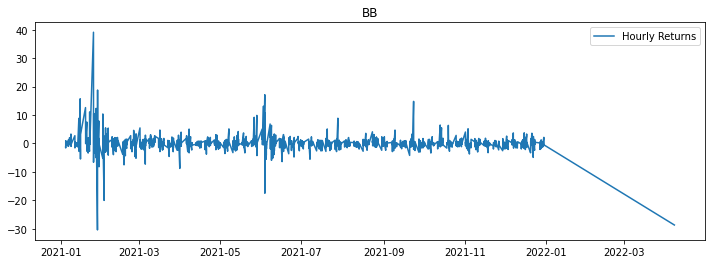

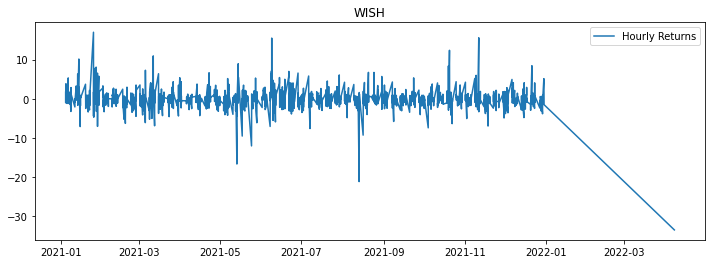

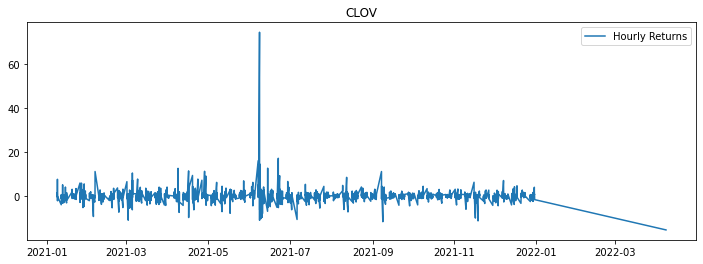

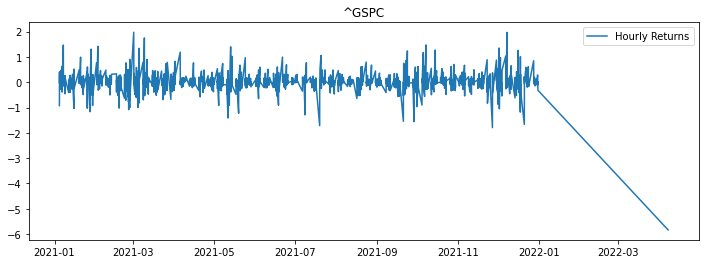

In [ ]:
for i in ['AMZN', 'TSLA', 'META', 'FB', 'NOK', 'PLTR', 'AMC', 'BB', 'WISH', 'CLOV','^GSPC',]:
    h[i]['Hourly%Change'] = h[i]['Close'].pct_change()*100
#    h[i].dropna(inplace=True)
    fig = plt.figure()
    fig.set_figwidth(12)
    plt.plot(h[i]['Hourly%Change'], label = 'Hourly Returns')
    plt.legend(loc='upper right')
    plt.title(i)
    plt.show()

In [ ]:
for i in ['AMZN', 'TSLA', 'META', 'FB', 'NOK', 'PLTR', 'AMC', 'BB', 'WISH', 'CLOV','^GSPC',]:
#    h[i] = h[i].rename(columns = {'index':'Date'})
    h[i].index = pd.to_datetime(h[i].index)
    h[i]['dt'] = h[i].index
    h[i]['time'] = pd.to_datetime(h[i].index).time
    h[i].index = pd.to_datetime(h[i].index).date
    h[i]['TICKER'] = i
    h[i]['SD'] = h[i].groupby(h[i].index)['Hourly%Change'].std()
    h[i]['date'] = h[i].index
#    h[i] = h[i].iloc[6:] #remove first 6 rows since data extraction is not clean

In [ ]:
h['PLTR'].head(20)

,Open,High,Low,Close,Volume,Hourly%Change,dt,time,TICKER,SD,date
2020-12-31,23.993200,24.170000,23.889999,23.958099,0,NaN,2020-12-31 10:30:00-05:00,10:30:00,PLTR,0.352072,2020-12-31
2020-12-31,23.938000,24.000000,23.700001,23.980000,4828359,0.091410,2020-12-31 11:30:00-05:00,11:30:00,PLTR,0.352072,2020-12-31
2020-12-31,23.969999,24.000000,23.760000,23.820101,4101885,-0.666801,2020-12-31 12:30:00-05:00,12:30:00,PLTR,0.352072,2020-12-31
2020-12-31,23.820000,23.915001,23.700001,23.745701,2990402,-0.312341,2020-12-31 13:30:00-05:00,13:30:00,PLTR,0.352072,2020-12-31
2020-12-31,23.740000,23.889999,23.650000,23.715000,4162836,-0.129289,2020-12-31 14:30:00-05:00,14:30:00,PLTR,0.352072,2020-12-31
2020-12-31,23.709999,23.740000,23.520000,23.540001,5236417,-0.737926,2020-12-31 15:30:00-05:00,15:30:00,PLTR,0.352072,2020-12-31
2021-01-04,23.910000,24.070000,22.500000,23.894800,18265805,1.507219,2021-01-04 09:30:00-05:00,09:30:00,PLTR,1.316741,2021-01-04
2021-01-04,23.879999,24.500000,23.435101,24.330000,8637691,1.821316,2021-01-04 10:30:00-05:00,10:30:00,PLTR,1.316741,2021-01-04
2021-01-04,24.334999,24.340000,23.305000,23.870001,5985974,-1.890666,2021-01-04 11:30:00-05:00,11:30:00,PLTR,1.316741,2021-01-04
2021-01-04,23.860001,23.980000,23.590000,23.690001,2968239,-0.754086,2021-01-04 12:30:00-05:00,12:30:00,PLTR,1.316741,2021-01-04


In [ ]:
h['Low']

KeyError: ignored

In [ ]:
g = h.copy()

#since SD is the same hourly within the day, aggregate so we can merge later

for i in ['AMZN', 'TSLA', 'META', 'FB', 'NOK', 'PLTR', 'AMC', 'BB', 'WISH', 'CLOV','^GSPC']:
    g[i].time = g[i].time.astype(str)
    g[i] = g[i].loc[g[i]['time'] == '11:30:00']

### Merge and Output Files

In [ ]:
amc = pd.DataFrame(d['AMC']).reset_index(drop=True)
amc = amc[:-1] #drop extra row

cma = pd.DataFrame(g['AMC'])
cma.date = pd.to_datetime(cma.date)

amc_out = pd.merge(amc,cma, on='date')
amc_out = amc_out.drop(columns=['Open_y','High_y','Low_y','Close_y','Volume_y','Hourly%Change','time','dt'])#drop columns from rtlp as these are hourly date

In [ ]:
amzn = pd.DataFrame(d['AMZN']).reset_index(drop=True)
amzn = amzn[:-1] #drop extra row

nzma = pd.DataFrame(g['AMZN'])
nzma.date = pd.to_datetime(nzma.date)

amzn_out = pd.merge(amzn,nzma, on='date')
amzn_out = amzn_out.drop(columns=['Open_y','High_y','Low_y','Close_y','Volume_y','Hourly%Change','time','dt'])#drop columns from rtlp as these are hourly date

In [ ]:
bb = pd.DataFrame(d['BB']).reset_index(drop=True)
bb = bb[:-1] #drop extra row

dd = pd.DataFrame(g['BB'])
dd.date = pd.to_datetime(dd.date)

bb_out = pd.merge(bb,dd, on='date')
bb_out = bb_out.drop(columns=['Open_y','High_y','Low_y','Close_y','Volume_y','Hourly%Change','time','dt'])#drop columns from rtlp as these are hourly date

In [ ]:
clov = pd.DataFrame(d['CLOV']).reset_index(drop=True)
clov = clov[:-1] #drop extra row

volc = pd.DataFrame(g['CLOV'])
volc.date = pd.to_datetime(volc.date)

clov_out = pd.merge(clov,volc, on='date')
clov_out = clov_out.drop(columns=['Open_y','High_y','Low_y','Close_y','Volume_y','Hourly%Change','time','dt'])#drop columns from rtlp as these are hourly date

In [ ]:
fb = pd.DataFrame(d['FB']).reset_index(drop=True)
fb = fb[:-1] #drop extra row

bf = pd.DataFrame(g['FB'])
bf.date = pd.to_datetime(bf.date)

fb_out = pd.merge(fb,bf, on='date')
fb_out = fb_out.drop(columns=['Open_y','High_y','Low_y','Close_y','Volume_y','Hourly%Change','time','dt'])#drop columns from rtlp as these are hourly date

In [ ]:
gspc = pd.DataFrame(d['^GSPC']).reset_index(drop=True)
gspc = gspc[:-1] #drop extra row

cpsg = pd.DataFrame(g['^GSPC'])
cpsg.date = pd.to_datetime(cpsg.date)

gspc_out = pd.merge(gspc,cpsg, on='date')
gspc_out = gspc_out.drop(columns=['Open_y','High_y','Low_y','Close_y','Volume_y','Hourly%Change','time','dt'])#drop columns from rtlp as these are hourly date

In [ ]:
meta = pd.DataFrame(d['META']).reset_index(drop=True)
meta = meta[:-1] #drop extra row

atem = pd.DataFrame(g['META'])
atem.date = pd.to_datetime(atem.date)

meta_out = pd.merge(meta,atem, on='date')
meta_out = meta_out.drop(columns=['Open_y','High_y','Low_y','Close_y','Volume_y','Hourly%Change','time','dt'])#drop columns from rtlp as these are hourly date

In [ ]:
nok = pd.DataFrame(d['NOK']).reset_index(drop=True)
nok = nok[:-1] #drop extra row

kon = pd.DataFrame(g['NOK'])
kon.date = pd.to_datetime(kon.date)

nok_out = pd.merge(nok,kon, on='date')
nok_out = nok_out.drop(columns=['Open_y','High_y','Low_y','Close_y','Volume_y','Hourly%Change','time','dt'])#drop columns from rtlp as these are hourly date

In [ ]:
pltr = pd.DataFrame(d['PLTR']).reset_index(drop=True)
pltr = pltr[:-1] #drop extra row

rtlp = pd.DataFrame(g['PLTR'])
rtlp.date = pd.to_datetime(rtlp.date)

pltr_out = pd.merge(pltr,rtlp, on='date')
pltr_out = pltr_out.drop(columns=['Open_y','High_y','Low_y','Close_y','Volume_y','Hourly%Change','time','dt'])#drop columns from rtlp as these are hourly date

In [ ]:
tsla = pd.DataFrame(d['TSLA']).reset_index(drop=True)
tsla = tsla[:-1] #drop extra row

alst = pd.DataFrame(g['TSLA'])
alst.date = pd.to_datetime(alst.date)

tsla_out = pd.merge(tsla,alst, on='date')
tsla_out = tsla_out.drop(columns=['Open_y','High_y','Low_y','Close_y','Volume_y','Hourly%Change','time','dt'])#drop columns from rtlp as these are hourly date

In [ ]:
wish = pd.DataFrame(d['WISH']).reset_index(drop=True)
wish = wish[:-1] #drop extra row

hsiw = pd.DataFrame(g['WISH'])
hsiw.date = pd.to_datetime(hsiw.date)

wish_out = pd.merge(wish,hsiw, on='date')
wish_out = wish_out.drop(columns=['Open_y','High_y','Low_y','Close_y','Volume_y','Hourly%Change','time','dt'])#drop columns from rtlp as these are hourly date

In [ ]:
amzn_out.to_csv('AMZN_2021.csv')
tsla_out.to_csv('TSLA_2021.csv')
meta_out.to_csv('META_2021.csv')
fb_out.to_csv('FB_2021.csv')
nok_out.to_csv('NOK_2021.csv')
pltr_out.to_csv('PLTR_2021.csv')
amc_out.to_csv('AMC_2021.csv')
bb_out.to_csv('BB_2021.csv')
wish_out.to_csv('WISH_2021.csv')
clov_out.to_csv('CLOV_2021.csv')
gspc_out.to_csv('GSPC_2021.csv')

# Post volume

In [ ]:
df2 = pd.read_csv('/combined_comments.csv')
df2.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,filename,author,body,created_utc,id,link_id,permalink,score,subreddit,search_term,post_name
0,SUPRATIK_0.csv,[deleted],[removed],1612316869.0,glt6x5e,t3_l7c2a3,/r/wallstreetbets/comments/l7c2a3/fuck_the_hed...,1.0,wallstreetbets,l7c2a3,Fuck the hedge funds; diamond hands. AMC to th...
1,SUPRATIK_0.csv,okgeezeok,https://youtu.be/gmq1ueWGKgY,1612139703.0,gljgye5,t3_l7c2a3,/r/wallstreetbets/comments/l7c2a3/fuck_the_hed...,1.0,wallstreetbets,l7c2a3,Fuck the hedge funds; diamond hands. AMC to th...
2,SUPRATIK_0.csv,LegitimateInjury5720,And to da moon,1611968923.0,glbe5gt,t3_l7c2a3,/r/wallstreetbets/comments/l7c2a3/fuck_the_hed...,1.0,wallstreetbets,l7c2a3,Fuck the hedge funds; diamond hands. AMC to th...
3,SUPRATIK_0.csv,[deleted],[removed],1611913183.0,gl7to3u,t3_l7c2a3,/r/wallstreetbets/comments/l7c2a3/fuck_the_hed...,1.0,wallstreetbets,l7c2a3,Fuck the hedge funds; diamond hands. AMC to th...
4,SUPRATIK_0.csv,jawnlerdoe,I’m all in at open too. We’re in this together.,1611895308.0,gl71p20,t3_l7c2a3,/r/wallstreetbets/comments/l7c2a3/fuck_the_hed...,1.0,wallstreetbets,l7c2a3,Fuck the hedge funds; diamond hands. AMC to th...


In [ ]:
df2[df2['body']=='h482grj']

,filename,author,body,created_utc,id,link_id,permalink,score,subreddit,search_term,post_name
115601,SUPRATIK_0.csv,1625567812,h482grj,t3_oerw42,/r/wallstreetbets/comments/oerw42/daily_popula...,66,wallstreetbets,oerw42,"Daily Popular Tickers Thread for July 06, 2021...",NaN,NaN


In [ ]:
df = pd.read_csv('comments_preprocessed_assigned.csv')
df = df[df.columns[3:]]
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (6,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,filename,author,body,created_utc,id,link_id,permalink,score,subreddit,search_term,...,clover,blackberry,nokia,tesla,contextlogic,ticker most mentioned in body,mentioned in body,mentioned in post_name,ticker most mentioned in post_name,ticker
0,SUPRATIK_0.csv,okgeezeok,NaN,1.61214e+09,gljgye5,t3_l7c2a3,/r/wallstreetbets/comments/l7c2a3/fuck_the_hed...,1,wallstreetbets,l7c2a3,...,0,0,0,0,0,amzn,0.0,1,amc,amc
1,SUPRATIK_0.csv,LegitimateInjury5720,da moon,1.61197e+09,glbe5gt,t3_l7c2a3,/r/wallstreetbets/comments/l7c2a3/fuck_the_hed...,1,wallstreetbets,l7c2a3,...,0,0,0,0,0,amzn,0.0,1,amc,amc
2,SUPRATIK_0.csv,jawnlerdoe,open together,1.6119e+09,gl71p20,t3_l7c2a3,/r/wallstreetbets/comments/l7c2a3/fuck_the_hed...,1,wallstreetbets,l7c2a3,...,0,0,0,0,0,amzn,0.0,1,amc,amc
3,SUPRATIK_0.csv,JokersKnight,invest strong really behind,1.61189e+09,gl6tpoi,t3_l7c2a3,/r/wallstreetbets/comments/l7c2a3/fuck_the_hed...,1,wallstreetbets,l7c2a3,...,0,0,0,0,0,amzn,0.0,1,amc,amc
4,SUPRATIK_0.csv,JoeWelburg,amc legit go roof tomorrow,1.61189e+09,gl6pihh,t3_l7c2a3,/r/wallstreetbets/comments/l7c2a3/fuck_the_hed...,2,wallstreetbets,l7c2a3,...,0,0,0,0,0,amc,1.0,1,amc,amc


In [ ]:
def check(x):
    try:
        if float(x):
            return 1
        else:
            return 0
    except:
        return 0 
df['check'] = df['created_utc'].apply(check)
df = df[df['check']==1] #removed some wonky data
df = df.dropna(subset=['created_utc'],axis=0)
df = df.drop('check',axis=1)

In [ ]:
df['created_utc'] = df['created_utc'].astype('float')

from datetime import datetime
df['created_utc_datetime'] = df['created_utc'].apply(lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m-%d'))
grouped_df = df.groupby(by=['ticker','created_utc_datetime']).size().reset_index()

In [ ]:
df['ticker'].unique()

array(['amc', 'wish', 'bb', 'pltr', 'clov', 'tsla', 'amzn', 'nok', 'fb',
       'meta'], dtype=object)

In [ ]:
import numpy as np
for j in df['ticker'].unique():
    gdf = grouped_df[grouped_df['ticker']==j]
    gdf['created_utc_datetime'] = pd.to_datetime(gdf['created_utc_datetime'])
    gdf = gdf.set_index('created_utc_datetime')
    gdf = gdf.resample('D').sum()
    gdf.columns = ['post_count']
    fd = gdf.copy(deep=True)
    for i in range(1,8):
        if i > 1:
            roll = gdf['post_count'].rolling(i).sum()
            fd = fd.join(roll, rsuffix = '_rolling_'+str(i)+'days')
            mean = gdf['post_count'].rolling(i).mean()
            fd = fd.join(mean, rsuffix = '_mean_rolling_'+str(i)+'days')
        pct_change = gdf['post_count'].pct_change(periods=i)*100
        fd = fd.join(pct_change, rsuffix= '_'+str(i)+'days_pct_change')
    fd.replace([np.inf, -np.inf],100, inplace=True)
    fd.to_csv(str(j).upper()+'_postcount.csv')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
str(j).upper()+'_postcount.csv'

'AMC_postcount.csv'

In [ ]:
dfamc=pd.read_csv('/content/AMC_2021.csv')
dfamc=dfamc.dropna()

X=dfamc.drop(['Close_x','Unnamed: 0','Open_x','High_x','Low_x','date','TICKER'], axis=1)
y=dfamc['Close_x']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2
                                                    , random_state=0)



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.10162e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.10162e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.10162e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.10162e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-condit

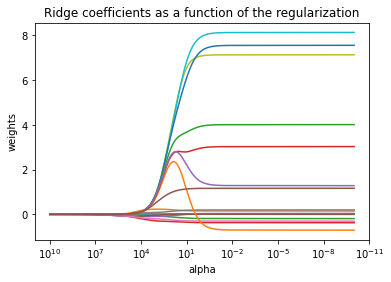

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

n_alphas = 500
alphas = np.logspace(-10, 10, n_alphas)

coefficients = []

for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_train, y_train)
    coefficients.append(ridge.coef_)

ax = plt.gca()
ax.plot(alphas, coefficients)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis

plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.975e+04, tolerance: 2.058e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.975e+04, tolerance: 2.058e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

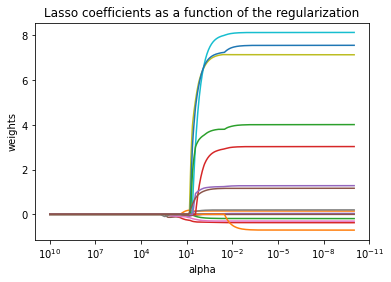

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

n_alphas = 400
alphas = np.logspace(-10, 10, n_alphas)

coefficients = []

for a in alphas:
    lasso = linear_model.Lasso(alpha=a, fit_intercept=False)
    lasso.fit(X_train, y_train)
    coefficients.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas, coefficients)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis

plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Lasso coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

GBR=GradientBoostingRegressor()
search_gridGBR={'n_estimators':[500],'learning_rate':[.001,0.01],'max_depth':[1],'subsample':[.5],'random_state':[1]}
searchGBR=GridSearchCV(estimator=GBR,param_grid=search_gridGBR,scoring='r2',n_jobs=1)

searchGBR.fit(X_train,y_train)
searchGBR.best_params_

{'learning_rate': 0.01,
 'max_depth': 1,
 'n_estimators': 500,
 'random_state': 1,
 'subsample': 0.5}

In [ ]:
searchGBR.best_score_

0.02516843862550755

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.3945474243910535

In [ ]:
import os
import glob
import pandas as pd
os.chdir

<function posix.chdir>

In [ ]:
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [ ]:
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

In [ ]:
combined_csv.to_csv( "combined_csv.csv", index=False)

In [ ]:
df=combined_csv.dropna()
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')

enc_df = pd.DataFrame(enc.fit_transform(df[['TICKER']]).toarray())
df = df.join(enc_df)

X=df.drop(['Close_x','Unnamed: 0','Open_x','High_x','Low_x','date','TICKER'], axis=1)
y=df['Close_x']

In [ ]:
X

,Volume_x,Daily%Change,2D%Change,3D%Change,4D%Change,5D%Change,6D%Change,7D%Change,Dir,2Dir,...,1,2,3,4,5,6,7,8,9,10
3,13886000,-4.240765,-6.542053,-11.949683,-12.609241,-3.647624,-7.223328,-10.313899,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,13765600,0.071430,-4.172364,-6.475296,-11.886789,-12.546818,-3.578799,-7.157057,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,13851400,-5.496077,-5.428573,-9.439125,-11.615486,-16.729559,-17.353312,-8.878183,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,176069,1.085481,0.067154,-0.732849,-0.666669,0.067154,-1.455028,-1.128070,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,13329600,3.851966,-1.855819,-1.785714,-5.950752,-8.210945,-13.522011,-14.169790,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,6489400,-2.436436,-2.021272,-2.848096,-2.125397,-0.432432,3.716215,0.436205,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
249,10747000,-0.947374,-0.935926,2.296866,3.779691,2.615197,5.374094,2.741243,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
249,22613700,-5.642635,-10.416664,-15.921786,-13.505748,-14.971751,-2.588994,-6.811146,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
249,9834900,-0.158734,-0.788647,1.615507,2.442998,5.360137,6.429782,4.658897,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2
                                                    , random_state=1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.39226e-32): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.72023e-32): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692:

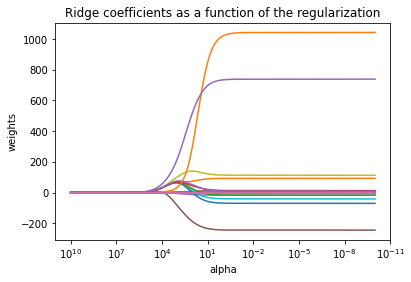

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

n_alphas = 500
alphas = np.logspace(-10, 10, n_alphas)

coefficients = []

for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_train, y_train)
    coefficients.append(ridge.coef_)

ax = plt.gca()
ax.plot(alphas, coefficients)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis

plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.036e+09, tolerance: 5.739e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might wan

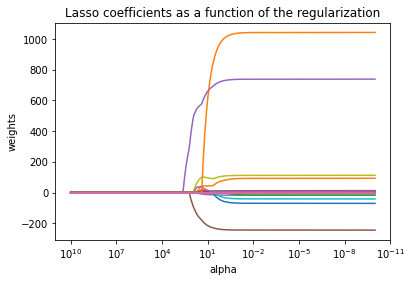

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

n_alphas = 400
alphas = np.logspace(-10, 10, n_alphas)

coefficients = []

for a in alphas:
    lasso = linear_model.Lasso(alpha=a, fit_intercept=False)
    lasso.fit(X_train, y_train)
    coefficients.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas, coefficients)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis

plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Lasso coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.3945474243910535